<a href="https://colab.research.google.com/github/anirbansen3027/Practice/blob/main/KMeansClusteringScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

In [5]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [168]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
X = pd.DataFrame(X, columns = df.columns)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [177]:
cor = X.corr()
cor.style.background_gradient(cmap = 'coolwarm')

,sepal length (cm),sepal width (cm)
sepal length (cm),1.000000,-0.117570
sepal width (cm),-0.117570,1.000000


In [176]:
X.drop(['petal length (cm)','petal width (cm)'], axis = 1, inplace = True)

In [185]:
class KMeansClustering:
  def __init__(self, k = 2, tol = 0.00001, max_iter = 300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter
    self.inertia_ = 0
  
  def fit(self, X):
    num_samples, num_features = X.shape
    centroids = X.iloc[np.random.choice(num_samples,size = self.k, replace = False),:].to_numpy()
    class_labels = np.zeros(num_samples)
    #Changing centroids max_iters number of times
    for i in range(self.max_iter):
      #assignent step
      wcss = 0
      for i, row in enumerate(X.to_numpy()):
        euc_dist = [np.linalg.norm(np.subtract(np.array(row),np.array(center))) for center in centroids]
        class_labels[i] = np.argmin(euc_dist)
        wcss += (min(euc_dist)**2)
      #updation step
      new_centroids = [X.iloc[np.where(classes == i)[0].tolist(),:].mean(axis = 0).values for i in range(self.k)]
      #if the centroids change less than tolerance, we can stop
      if np.linalg.norm(np.subtract(new_centroids,centroids)) > self.tol:
        centroids = new_centroids
      else:
        break
    self.inertia_ = wcss
    return class_labels

  def predict():
    pass

In [200]:
wcss = []
for i in range(2,11):
  kmeans = KMeansClustering(k = i)
  class_labels = kmeans.fit(X)
  wcss.append(kmeans.inertia_)

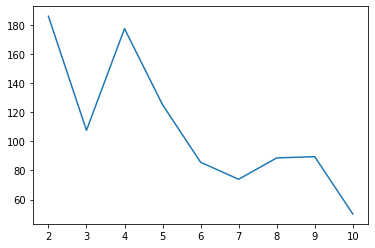

In [207]:
plt.plot(range(2,11),wcss)

In [216]:
class_labels

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [217]:
wcss = []
silhouette_scores = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=123)
  class_labels = kmeans.fit_predict(X)
  wcss.append(kmeans.inertia_)
  score = silhouette_score(X,np.array(class_labels))
  silhouette_scores.append(score)

In [231]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=123)
class_labels = kmeans.fit_predict(X)

Text(0, 0.5, 'silhouette_scores')

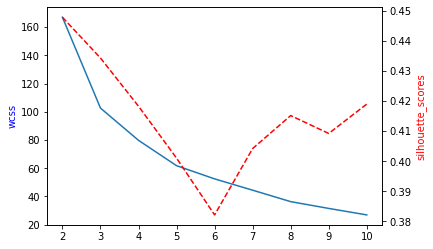

In [228]:
fig,ax1 = plt.subplots()
ax1.plot(range(2,11),wcss)
ax1.set_ylabel("wcss",color = 'blue')
ax2 = ax1.twinx()
ax2.plot(range(2,11),silhouette_scores, 'r--')
ax2.set_ylabel("silhouette_scores", color = 'red')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


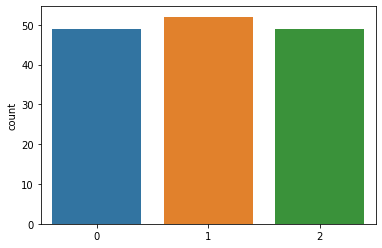

In [232]:
sns.countplot(class_labels)

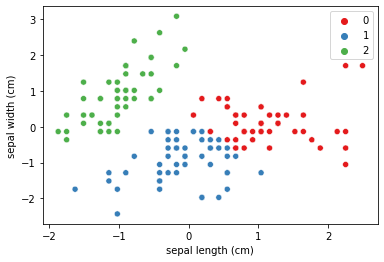

In [238]:
sns.scatterplot(x = X["sepal length (cm)"], y = X["sepal width (cm)"], hue = class_labels, palette = sns.color_palette("Set1",pd.Series(class_labels).nunique()))

In [239]:
X["labels"] = class_labels
X["silhouette_scores"] = silhouette_samples(X,X[["labels"]])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [240]:
X.groupby(["labels"])["silhouette_scores"].mean()

labels
0    0.524646
1    0.511489
2    0.559042
Name: silhouette_scores, dtype: float64